# Algerian Forest Fires

### Life cycle of Machine Learning project

- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Picking the Best Model

# 1) Problem Statement

- The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- Using this dataset we can clarify what are the circumstances which lead to forest fire.

# 2) Data Collection

- The dataset is collected from UCI website, provided by Center for Development of Advanced Technologies (CDTA).
- 122 instances for each region.
- The period from June 2012 to September 2012.
- The dataset includes 11 attributes and 1 output attribute (class)
- The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

## 2.1 Import Data & Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

warnings.filterwarnings("ignore")

%matplotlib inline

#### Loading Data

In [2]:
df = pd.read_csv('data/Algerian_forest_fires_dataset_UPDATE.csv', header=1)

#### Removing Unwanted Rows

In [3]:
df = df.drop(labels=[122,123],axis=0)

df.reset_index(inplace=True)

#### Show Top 5 Records

In [4]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Feature Information

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

- **Temp** : temperature noon (temperature max) in Celsius degrees: 22 to 42
- **RH** : Relative Humidity in %: 21 to 90
- **Ws** :Wind speed in km/h: 6 to 29
- **Rain**: total day in mm: 0 to 16.8

**Fire Weather Index (FWI) Components**

- Fine Fuel Moisture Code (**FFMC**) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (**DMC**) index from the FWI system: 1.1 to 65.9
- Drought Code (**DC**) index from the FWI system: 7 to 220.4
- Initial Spread Index (**ISI**) index from the FWI system: 0 to 18.5
- Buildup Index (**BUI**) index from the FWI system: 1.1 to 68
- Fire Weather Index (**FWI**) Index: 0 to 31.1
- **Classes**: two classes, namely Fire and not Fire

#### Shape of the dataset

In [5]:
df.shape

(244, 15)

#### Summary of the Dataset

In [6]:
# Display summary statistics of a dataframe

df.describe()

,index
count,244.000000
mean,122.500000
std,71.450492
min,0.000000
25%,60.750000
50%,122.500000
75%,184.250000
max,245.000000


#### Checking Datatypes in Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5    RH          244 non-null    object
 6    Ws          244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      243 non-null    object
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


##### There is ONE Null value in Classes column and all the features datatypes are non-numeric

#### Removing unnecessary space in columns

In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

#### Fixing Errors in Data & Handing NaN Values

In [9]:
# Column FWI is misplaced with the value of Classes & missing it's own value.

df[164:167]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
164,166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
165,167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
166,168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire


In [10]:
# Replacing the wrong value of FWI with NaN. We will replace it with Median value once we convert these columns into numerical

df.FWI[165] = np.nan

In [11]:
# Striping unwanted space from classes feature

df['Classes'] = df['Classes'].astype(str).str.strip()

In [12]:
# Filling the NaN value of Classes with mode value

mode_val = df['Classes'].mode()
df.iloc[165,-1] = mode_val[0]

df[165:167]  #Checking fixed values

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,NaN,fire
166,168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire


In [13]:
# In DC column we found a string written as 14.6 9  instead of 14.69, fixing it using apply function

df['DC'] = df.DC.apply(lambda x: x.replace(" ",""))

df['DC'][165]

'14.69'

#### Changing Datatype of features with numbers

In [14]:
df.iloc[:,:-1] = df.iloc[:,:-1].apply(pd.to_numeric)

#### Checking new datatypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        244 non-null    int64  
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   Ws           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      244 non-null    object 
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


# 3. EXPLORING DATA

In [16]:
# Dropping unwanted features

df.drop(['index'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)


#### Fixing NaN Value in FWI

In [17]:
median = df['FWI'].median()

df['FWI'].fillna(median, inplace=True)

#### Encoding not fire as 0 and Fire as 1

In [18]:
df['Classes'] = np.where(df['Classes']=='fire',1,0)

#### Finding Correlation between Classes & other features

In [19]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350960,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083285,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773,-0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791,0.584188
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634,0.507132
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163,0.735511


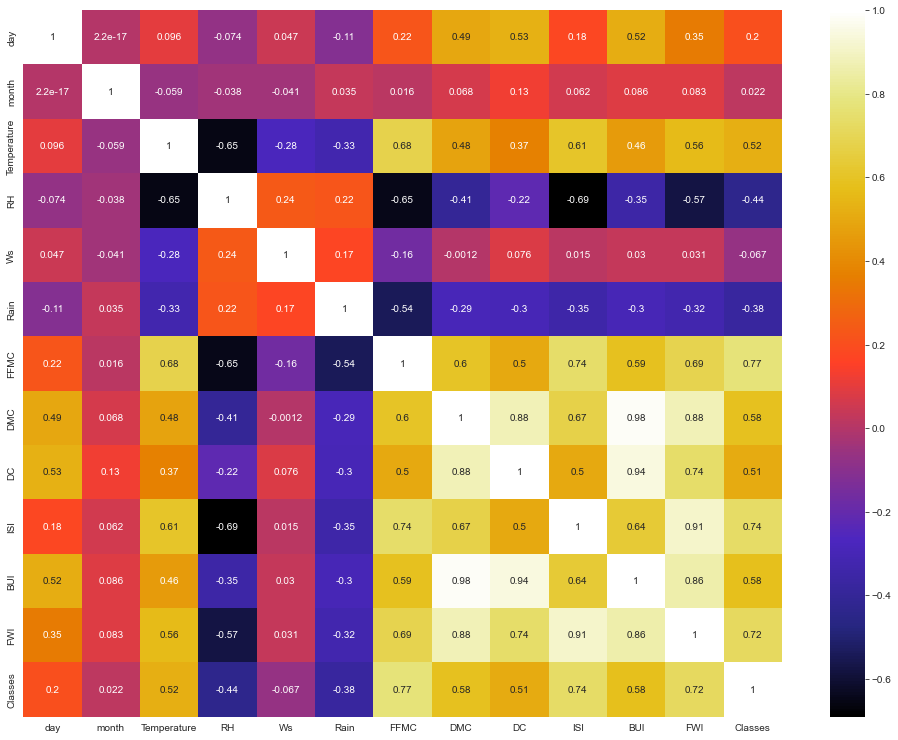

In [20]:
plt.figure(figsize = (17,13))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

#### Report :

- Our Target column is Negative or Weak Correlation with RH (Relative humidity) & Rain. It's correct because more humidity in environment will decrease the chances of wild fire.
- FFMC, FWI, ISI has High Correlation with Forest Fire. More they are, higher the chances of Fire to spread.
- Relative Humidity is strongly negative correlated with ISI, FWI & FFMC.
- Duff Moisture Code & Buildup Index are very strongly correlated.
- Drought Code & Buildup Index are also strongly correlated.
- We can easily figure out that all the factors which are related to warmness in temperature or in general, they easily become the reason for fire.

## Univariate Analysis

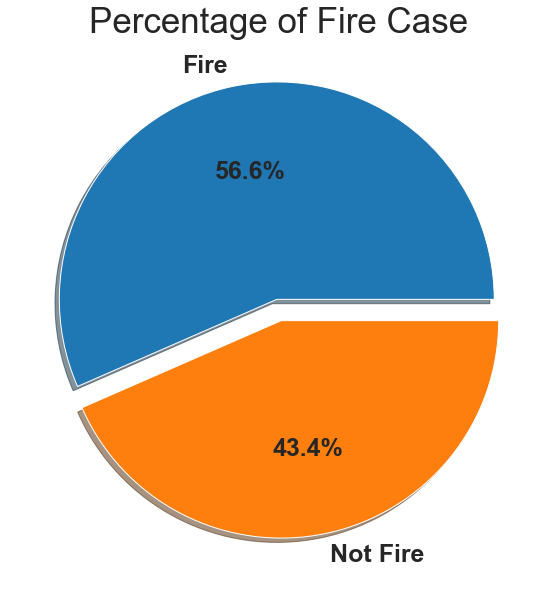

In [21]:
perc = df.Classes.value_counts(normalize=True)*100

classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(perc,labels=classes_labels,autopct="%1.1f%%", textprops={'fontweight':'bold', 'fontsize':25}, explode=(0.05,0.05), shadow=True)
plt.title("Percentage of Fire Case", fontsize=35)
plt.show()

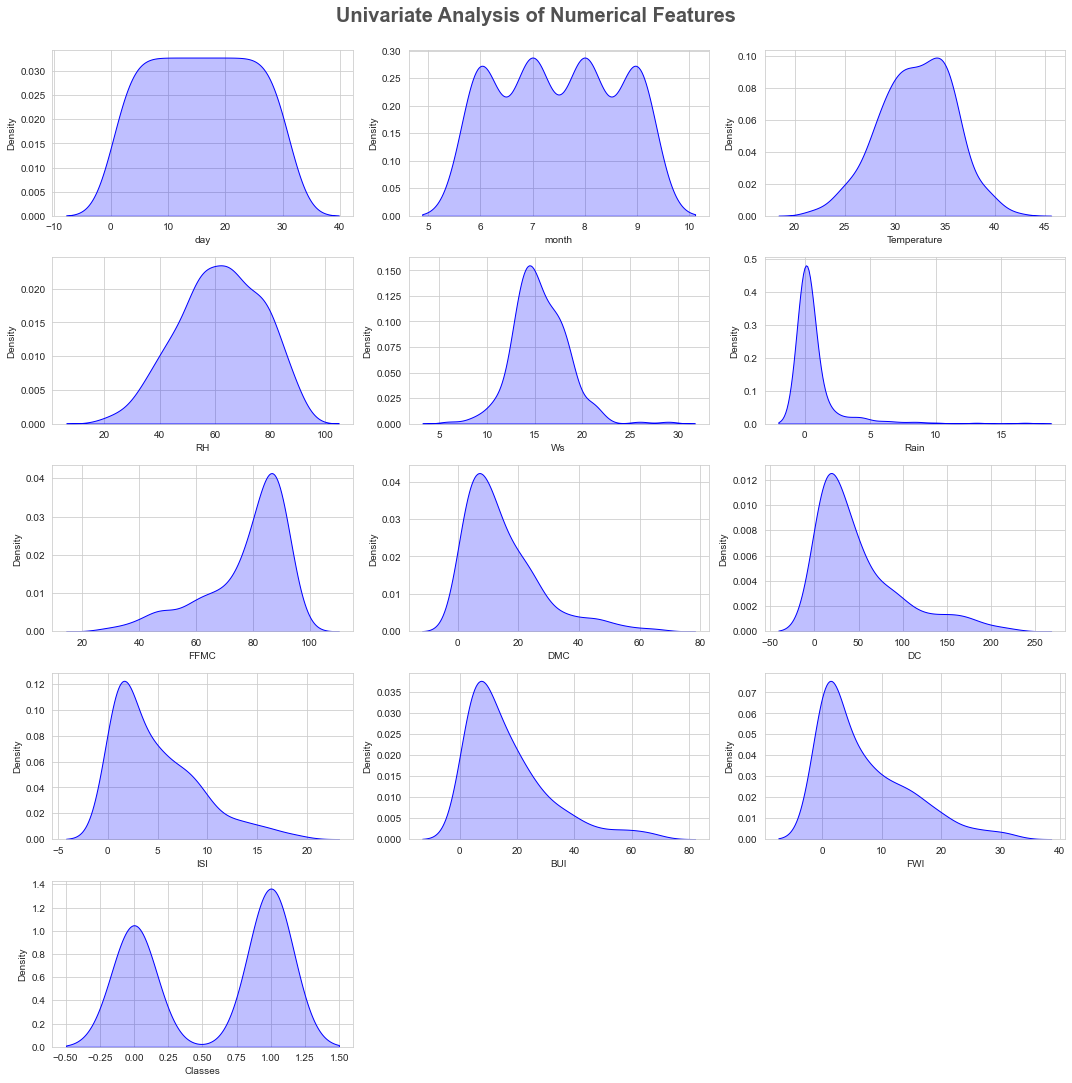

In [22]:
numeric_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Visual Observation of Bivariates / Multivariates

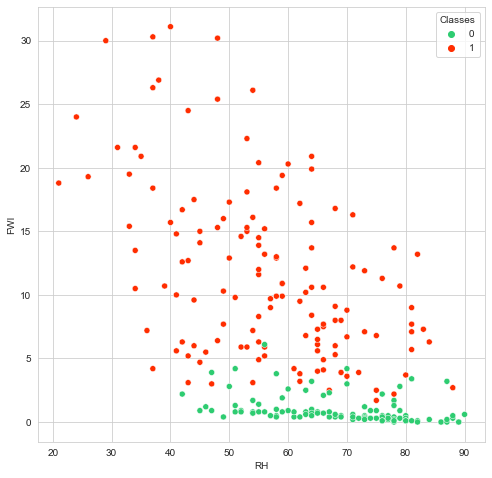

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='RH', y='FWI', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.show();

#### Report :

- Relative Humidity & Fire Weather Index are inversely proportional.
- When RH is low, there is high FWI which increases the Fire Rate.
- When RH is high, there is huge chance of No Fire.

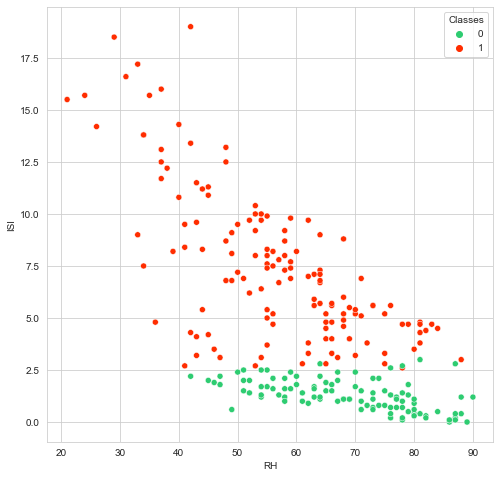

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='RH', y='ISI', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.show();

#### Report :

- Relative Humidity & Initial Spread Index are inversely proportional.
- When RH is low, there is high FWI which increases the Fire Rate.
- When RH is high, there is huge chance of No Fire.

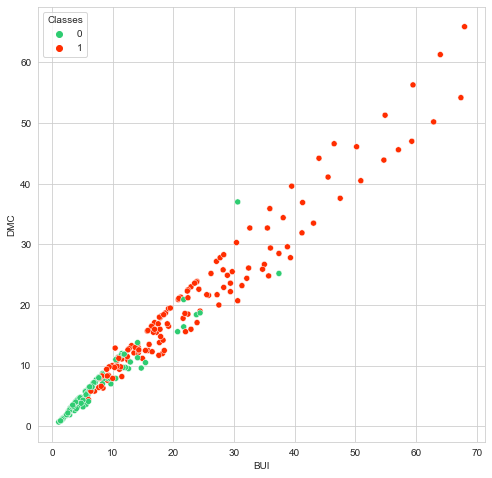

In [25]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='BUI', y='DMC', data=df, hue='Classes',palette=['#2ECC71',"#FF2D00"] )
plt.show();

#### Report :

- Buildup Index (BUI) and Duff Moisture Code (DMC) are highly correlated and directly proportioal to each other
- When both fo them are HIGH there are HIGH chances of Fire!

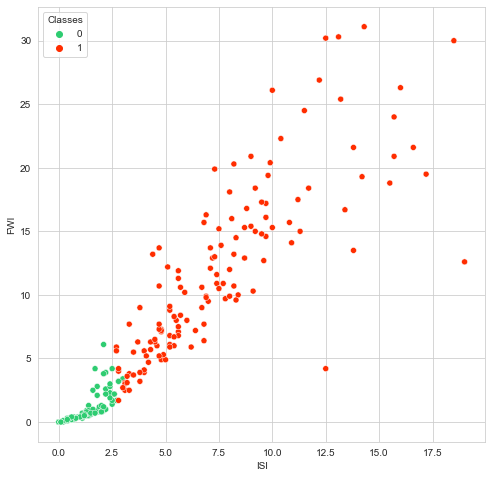

In [26]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='ISI', y='FWI', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.show();

#### Report :

- Initial Spread Index (ISI) and Fire Weather Index (FWI) are highly correlated and directly proportional to each other
- When both fo them are HIGH there are HIGH chances of Fire!

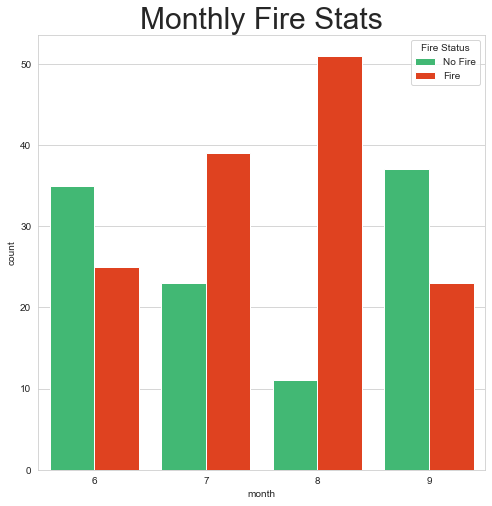

In [27]:
plt.figure(figsize=(8, 8))
sns.countplot(x='month', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'])
plt.title("Monthly Fire Stats", fontsize=30)
plt.show();

#### Report :

- July & August Month has very high chances of having Fire in Forest.
- August is most vulnerable out of all.
- September is lowest among all.

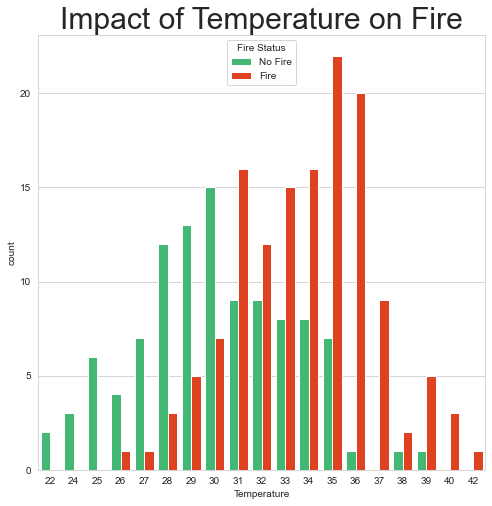

In [28]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Temperature', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'])
plt.title("Impact of Temperature on Fire", fontsize=30)
plt.show();

#### Report :

- When Temperature is low i.e. under 26, there is NO fire case.
- When Temperature is high i.e. above 30, there are high cases of fire.
- Temperature and Fire Rate Case direct proportionality can be easily seen.

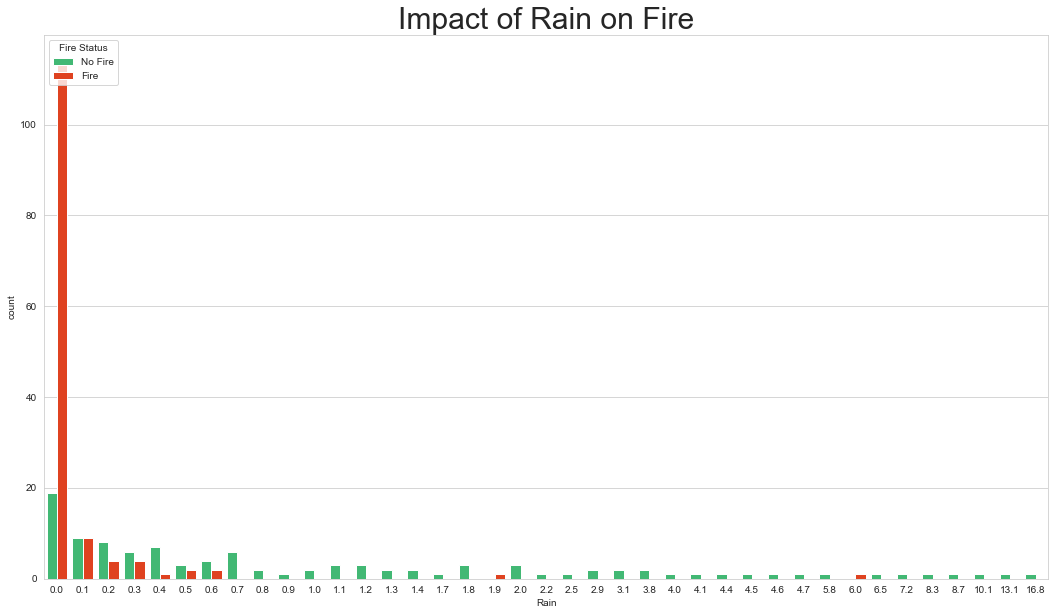

In [29]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Rain', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'])
plt.title("Impact of Rain on Fire", fontsize=30)
plt.show();

#### Report :

- Area of Algeria receive really less rainfall.
- Majority of data lies under 1mm.
- As soon it rains more than 0.6mm, there are rarely any Forest Fire Case.
- There is strikingly high case of Fire when there is NO RAIN.

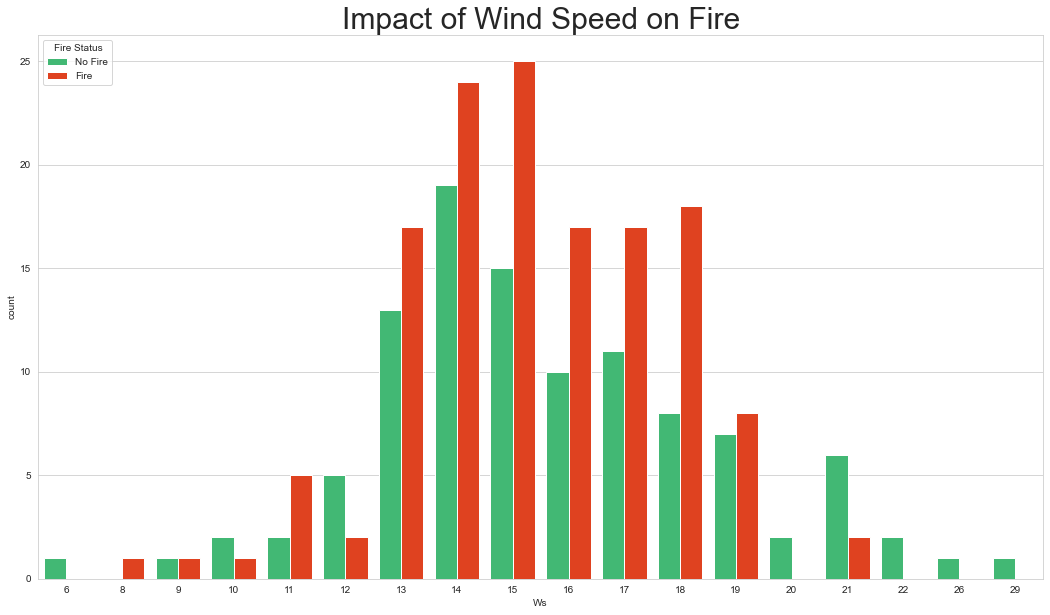

In [30]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Ws', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'], loc='upper left')
plt.title("Impact of Wind Speed on Fire", fontsize=30)
plt.show();

#### Report :

- Wind Speed doesn't seems to have much impact on Fire Cases.
- When Wind speed is quite low and when wind speed is quite high, in both cases we see almost no case.
- There is high concentration of Fire Incidents when wind speed is between 13km/h to 19km/h.

----------------------------------------------------------------------------------

# -------------                   Model Training                       ---------------

> ## Separating Dependent & Independent Features

In [31]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [32]:
# INDEPENDENT Features

X = pd.DataFrame(df, columns=['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'])

# DEPENDENT Feature

y = pd.DataFrame(df, columns=['Temperature'])

#### Checking our New Datas

In [33]:
# Independent
X.shape

(244, 12)

In [34]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [35]:
# Dependent
y.shape

(244, 1)

In [36]:
y.head()

,Temperature
0,29
1,29
2,26
3,25
4,27


> ## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
X_train.shape

(163, 12)

In [39]:
X_test.shape

(81, 12)

In [40]:
y_train.shape

(163, 1)

In [41]:
# Checking our newly formed dataset

X_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
114,23,9,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0
65,5,8,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1
132,11,6,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1
162,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0


> ## Feature Scaling / Standardizing
>
> - We are doing it to reach Global minima quickly

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [43]:
# Standardizing our Training Data

X_train = scaler.fit_transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

In [45]:
# Checking our modified dataset

X_train[:5]

array([[ 0.84447703,  1.3826723 , -0.60257784, -1.68484146, -0.17054229,
        -0.21111893, -0.52803826, -0.37632548, -0.80014076, -0.47763563,
        -0.8196431 , -1.04390785],
       [-1.19310159,  0.48116996,  0.14460201, -0.93856657, -0.39436188,
         0.68368506, -0.27533182, -0.3905248 ,  0.16132584, -0.3471914 ,
        -0.08219052,  0.95793896],
       [-0.51390872, -1.32183472, -1.41768313,  2.04653297, -0.39436188,
         0.94324652,  0.28536062, -0.374297  ,  2.13233237,  0.09906517,
         1.36540157,  0.95793896],
       [ 1.07087465,  0.48116996, -1.55353401,  0.92712064, -0.39436188,
         1.04570499,  3.29414677,  2.20186494,  2.34866235,  2.94824172,
         3.33194176,  0.95793896],
       [-0.51390872, -0.42033238, -0.46672696, -0.19229169,  0.90379174,
        -0.13598272, -0.59121488, -0.80027654, -0.7039941 , -0.66986923,
        -0.80598657, -1.04390785]])

## ***LINEAR REGRESSION***

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lin_reg = LinearRegression()

In [48]:
# Fitting the data ... Finding parameter

lin_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
# Checking all our Coefficients and Intercept

print(f"Coefficients :- {lin_reg.coef_}")
print(f"\n Intercept :- {lin_reg.intercept_}")


Coefficients :- [[-0.62177814 -0.32463433 -0.99196434 -0.56091873  0.23137708  1.89900941
   1.09670541  1.12720947  0.05939014 -1.45983089  0.16214053 -0.24878826]]

 Intercept :- [31.98159509]


> **If all other features are 0 then temperature is 31.9**

> ### Prediction for Test Data

In [50]:
lin_reg_pred = lin_reg.predict(X_test)

In [52]:
lin_reg_pred[:5]

array([[32.91810328],
       [35.06325057],
       [34.6561543 ],
       [32.76716531],
       [36.62217856]])

> ### Assumptions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

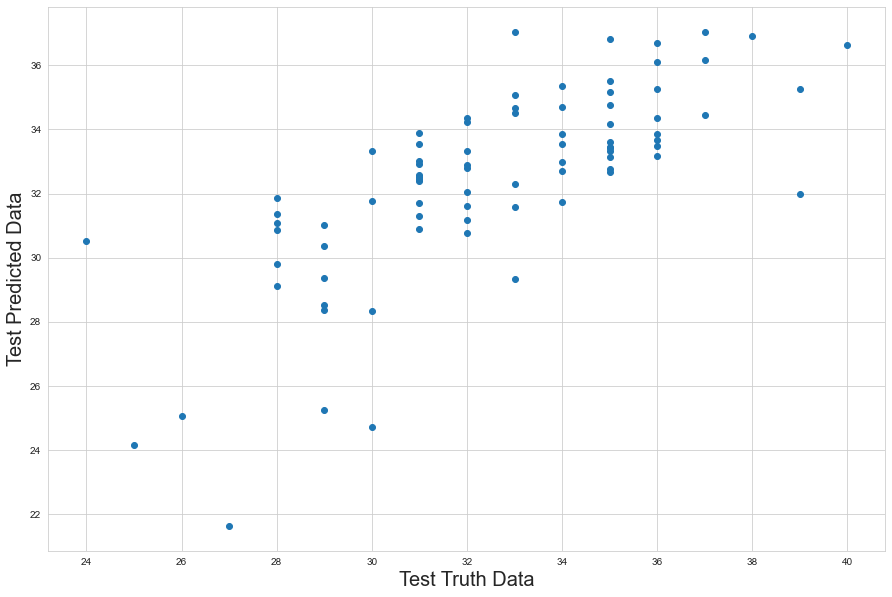

In [57]:
# Comparing actual and predicted points

plt.figure(figsize=(15,10))
plt.scatter(y_test,lin_reg_pred)
plt.xlabel("Test Truth Data", fontsize=20)
plt.ylabel("Test Predicted Data", fontsize=20)

> ### Residuals

In [59]:
residuals = y_test - lin_reg_pred

residuals[:5]       # These are errors

,Temperature
24,-1.918103
6,-2.063251
153,-1.656154
211,2.232835
198,3.377821


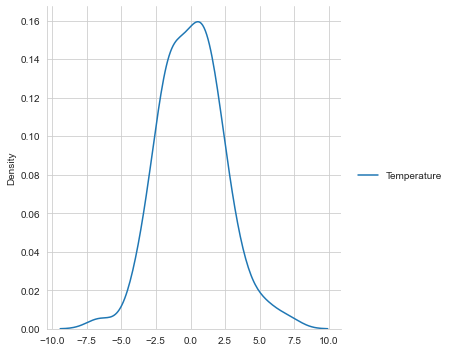

In [60]:
sns.displot(residuals, kind="kde")

#### Our Graph is close to Gaussian, means our model is good

> ### Scatter Plot with Predictions & Residual

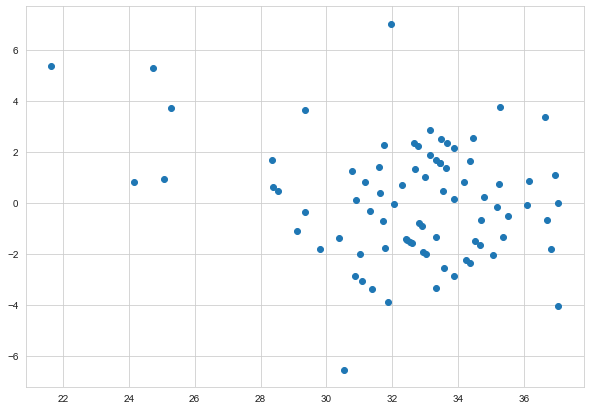

In [63]:
## Uniform Distribution
plt.figure(figsize=(10,7))
plt.scatter(lin_reg_pred, residuals)

#### No shape, it’s uniformly distributed. It shouldn’t be linear plot

> ### Performance Metrics

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Squared Error:- ", mean_squared_error(y_test, lin_reg_pred))
print("Mean Absolute Error:- ", mean_absolute_error(y_test, lin_reg_pred))
print("Root Mean Squared Error:- ", np.sqrt(mean_squared_error(y_test, lin_reg_pred)))

Mean Squared Error:-  5.262366893813614
Mean Absolute Error:-  1.8158839119614536
Root Mean Squared Error:-  2.2939849375733954


> #### R square

In [67]:
from sklearn.metrics import r2_score

score = r2_score(y_test, lin_reg_pred)
print(score)

0.5100554960932153


> #### Adjusted R square

In [68]:
1 - (1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1] - 1)

0.42359470128613563

### Observation :-

- Our R2 score is 51% means Low Accuracy
- Our Adjusted R2 is approx 42% indicated a bad model!

-------------------------------------------------------------

# ***Ridge Regression***

In [70]:
from sklearn.linear_model import Ridge

In [71]:
ridge = Ridge()

In [72]:
# Fitting the data ... Finding parameter

ridge.fit(X_train, y_train)

Ridge()

In [73]:
# Checking all our Coefficients and Intercept

print(f"Coefficients :- {ridge.coef_}")
print(f"\n Intercept :- {ridge.intercept_}")

Coefficients :- [[-0.60869767 -0.31417762 -1.00916741 -0.55940847  0.20806346  1.83460273
   0.52418542  0.80172658  0.12845929 -0.52322335  0.04997329 -0.23925498]]

 Intercept :- [31.98159509]


#### We can see Intercept value is same as Linear Regression.

> ### Prediction for Test Data

In [74]:
ridge_pred = ridge.predict(X_test)

ridge_pred[:5]

array([[32.91636277],
       [35.00725108],
       [34.60735085],
       [32.7492522 ],
       [36.58173373]])

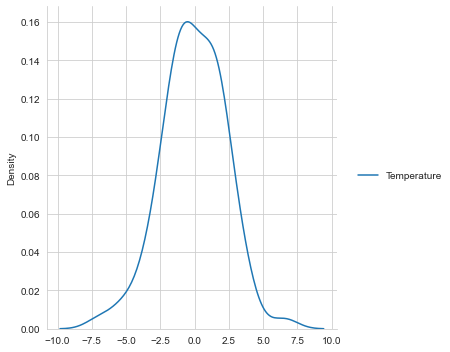

In [75]:
sns.displot(ridge_pred-y_test, kind='kde')

> ### Assumption on Ridge Regression

Text(0, 0.5, 'Test Predicted Data')

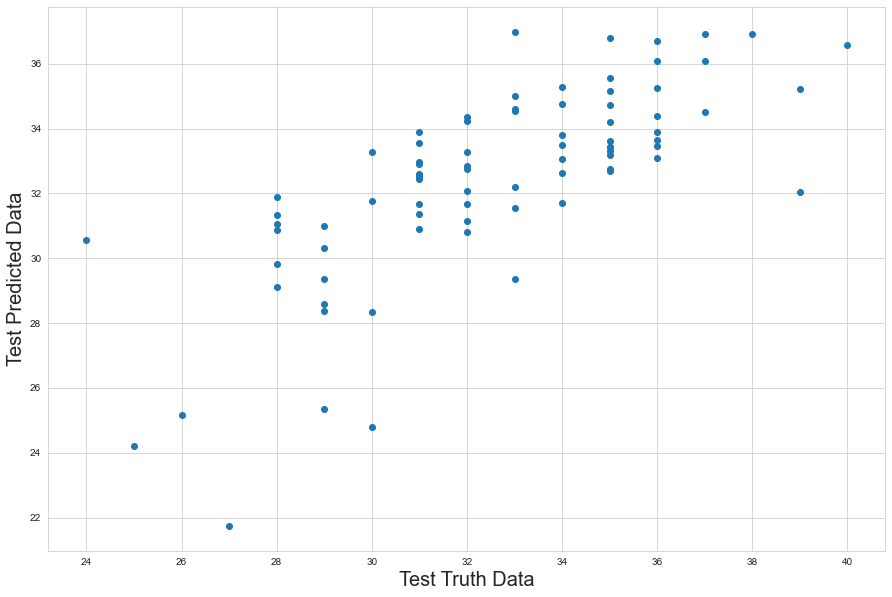

In [76]:
# Comparing actual and predicted points

plt.figure(figsize=(15, 10))
plt.scatter(y_test, ridge_pred)
plt.xlabel("Test Truth Data", fontsize=20)
plt.ylabel("Test Predicted Data", fontsize=20)

> ### Residual

In [77]:
residual = y_test - ridge_pred

residual [:5]

,Temperature
24,-1.916363
6,-2.007251
153,-1.607351
211,2.250748
198,3.418266


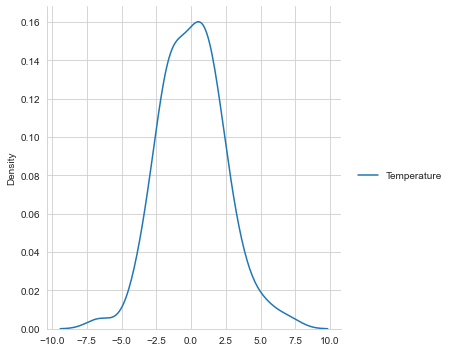

In [78]:
sns.displot(residual, kind='kde')

> ### Scatter Plot with Residual & Prediction

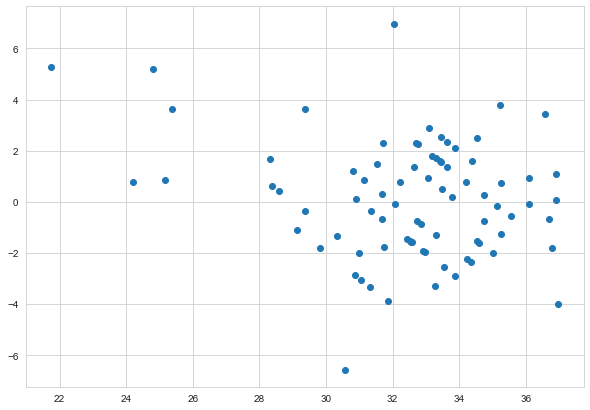

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(ridge_pred, residual)

> ### Performance Metrics

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Squared Error:- ", mean_squared_error(y_test, ridge_pred))
print("Mean Absolute Error:- ", mean_absolute_error(y_test, ridge_pred))
print("Root Mean Squared Error:- ", np.sqrt(mean_squared_error(y_test, ridge_pred)))

Mean Squared Error:-  5.203357396968151
Mean Absolute Error:-  1.8081867537011338
Root Mean Squared Error:-  2.281086889394648


> ### R Square

In [82]:
from sklearn.metrics import r2_score

ridge_score = r2_score(y_test, ridge_pred)
ridge_score

0.5155494837305514

> ### Adjusted R Square

In [84]:
1 - (1-ridge_score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1] - 1)

0.43005821615358997

-----------------------------------------------------------

# ***Lasso Regression***

In [85]:
from sklearn.linear_model import Lasso

In [86]:
lasso = Lasso()

In [87]:
# Fitting the data ... Finding parameter

lasso.fit(X_train, y_train)

Lasso()

> ### Coefficient & Intercept

In [88]:
# Checking all our Coefficients and Intercept

print(f"Coefficients :- {lasso.coef_}")
print(f"\n Intercept :- {lasso.intercept_}")

Coefficients :- [-0.         -0.         -0.62324302 -0.         -0.          1.25581509
  0.          0.          0.          0.          0.          0.        ]

 Intercept :- [31.98159509]


> ### Prediction for Test Data

In [89]:
## Prediction for the test data

las_pred = lasso.predict(X_test)
las_pred[:5]

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444])

> ### Assumption on Lasso Regression

Text(0, 0.5, 'Test Predicted Data')

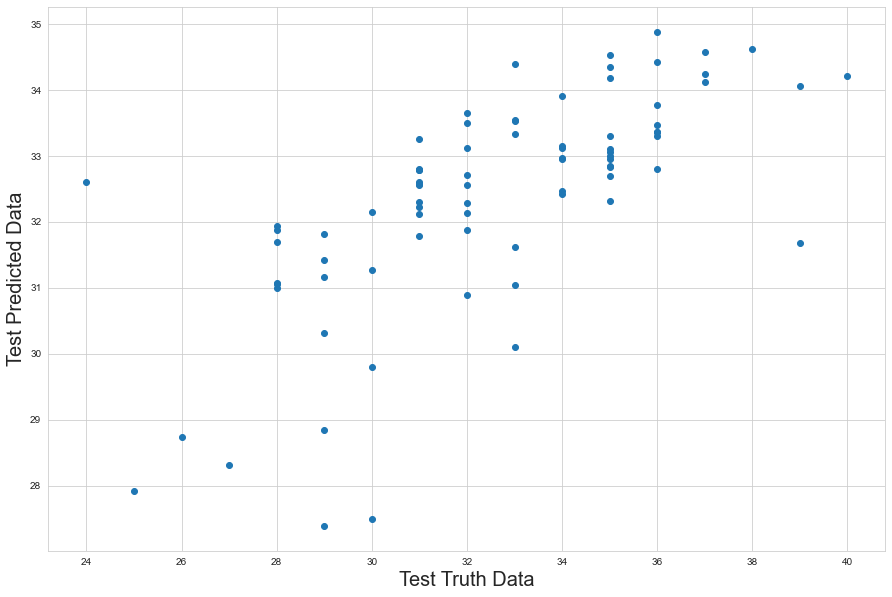

In [90]:
# Comparing actual and predicted points

plt.figure(figsize=(15, 10))
plt.scatter(y_test, las_pred)
plt.xlabel("Test Truth Data", fontsize=20)
plt.ylabel("Test Predicted Data", fontsize=20)

> ### Residual

In [100]:
las_pred = las_pred.reshape(81,1)

residual = y_test - las_pred

residual [:5]

,Temperature
24,-1.783811
6,-0.335821
153,-0.538357
211,2.308080
198,5.787876


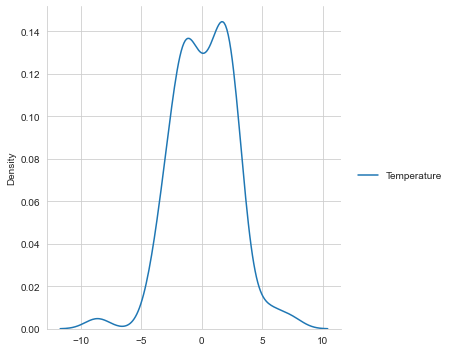

In [101]:
sns.displot(residual, kind='kde')

> ## Performance Metrics

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Squared Error:- ", mean_squared_error(y_test, las_pred))
print("Mean Absolute Error:- ", mean_absolute_error(y_test, las_pred))
print("Root Mean Squared Error:- ", np.sqrt(mean_squared_error(y_test, las_pred)))

Mean Squared Error:-  6.085458745527471
Mean Absolute Error:-  1.9978776414662658
Root Mean Squared Error:-  2.4668722596696147


> ### R Square

In [103]:
from sklearn.metrics import r2_score

las_score = r2_score(y_test,las_pred)
print(las_score)

0.4334228064508907


> ### Adjusted R Square

In [104]:
1 - (1-las_score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1] - 1)

0.33343859582457736

----------------------------------------------------

# ***Elastic Net Regression***

In [105]:
from sklearn.linear_model import ElasticNet

In [106]:
elastic = ElasticNet()

In [107]:
elastic.fit(X_train, y_train)

ElasticNet()

In [108]:
# Checking all our Coefficients and Intercept

print(f"Coefficients :- {elastic.coef_}")
print(f"\n Intercept :- {elastic.intercept_}")

Coefficients :- [-0.         -0.         -0.68808933 -0.10544712 -0.00834786  0.85162206
  0.10376148  0.          0.23158765  0.02547021  0.15362153  0.07372069]

 Intercept :- [31.98159509]


In [109]:
## Prediction for the test data

elastic_pred = elastic.predict(X_test)

In [110]:
elastic_pred[:5]

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ])

> ### Assumptions of Elastic Net Regression

Text(0, 0.5, 'Test Predicted Data')

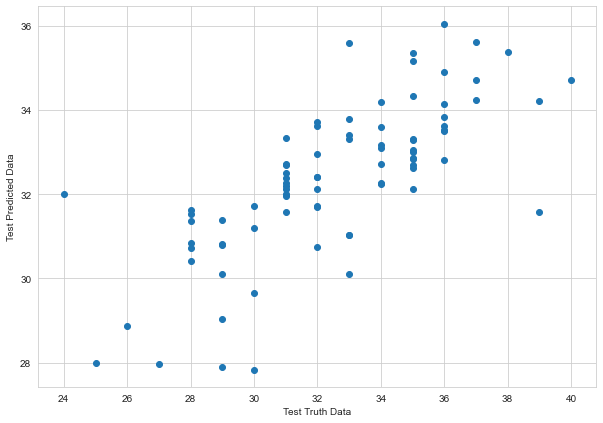

In [112]:
# Comparing actual and predicted points

plt.figure(figsize=(10,7))
plt.scatter(y_test,elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

> ### Residuals

In [116]:
## Residuals

elastic_pred = elastic_pred.reshape(81,1)
elastic_res = y_test - elastic_pred

print(elastic_res[:5])

     Temperature
24     -1.700149
6      -0.299101
153    -0.410266
211     2.389071
198     5.295251


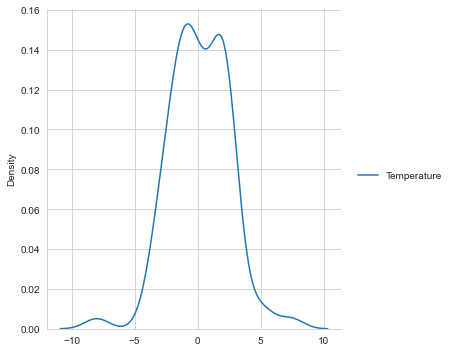

In [117]:
sns.displot(elastic_res, kind="kde")

> ### Scatter plot with predictions and residuals

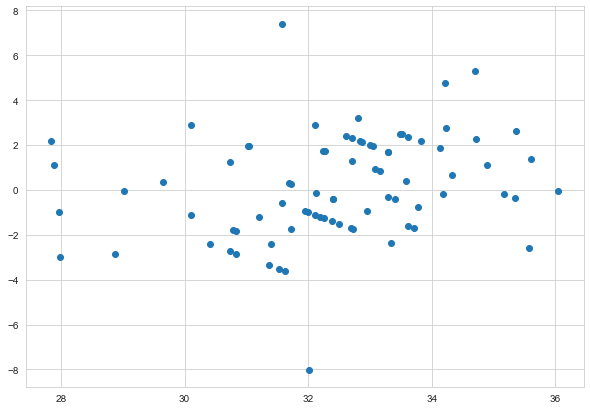

In [119]:
## Uniform Distribution
plt.figure(figsize=(10,7))

plt.scatter(elastic_pred, elastic_res)

> ## Performance Metrics

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Squared Error:- ", mean_squared_error(y_test, elastic_pred))
print("Mean Absolute Error:- ", mean_absolute_error(y_test, elastic_pred))
print("Root Mean Squared Error:- ", np.sqrt(mean_squared_error(y_test, elastic_pred)))

Mean Squared Error:-  5.3845764068533795
Mean Absolute Error:-  1.8465702429244903
Root Mean Squared Error:-  2.3204690057946


> ### R Square

In [122]:
from sklearn.metrics import r2_score

el_score = r2_score(y_test, elastic_pred)
print(el_score)

0.49867736901709914


> ### Adjusted R Square

In [123]:
1 - (1-el_score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1] - 1)

0.4102086694318814